<a href="https://colab.research.google.com/github/AyushBhandari03/CNN/blob/main/Rice_Type_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install tensorflow keras numpy pandas matplotlib scikit-learn opencv-python


In [ ]:
# Importing necessary libraries

# Building deep learning models
import tensorflow as tf
from tensorflow import keras
# For accessing pre-trained models
import tensorflow_hub as hub
# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import os
import numpy as np
import pathlib

In [ ]:
path = "/content/drive/MyDrive/DATASET/Rice_Image_Dataset" # Datasets path
path = pathlib.Path(path)
path

PosixPath('/content/drive/MyDrive/DATASET/Rice_Image_Dataset')

In [ ]:
arborio = list(path.glob('Arborio/*'))[:1000]
basmati = list(path.glob('Basmati/*'))[:1000]
ipsala = list(path.glob('Ipsala/*'))[:1000]
jasmine = list(path.glob('Jasmine/*'))[:1000]
karacadag = list(path.glob('Karacadag/*'))[:1000]

In [ ]:
data = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag': karacadag
}
rice_labels= {
    0: "Arborio",
    1: "Basmati",
    2: "Ipsala",
    3:"Jasmine",
    4:"Karacadag"
}
rice_name = {
    0: "Arborio Rice",
    1: "Basmati Rice",
    2: "Ipsala Rice",
    3:"Jasmine Rice",
    4:"Karacadag Rice"
}

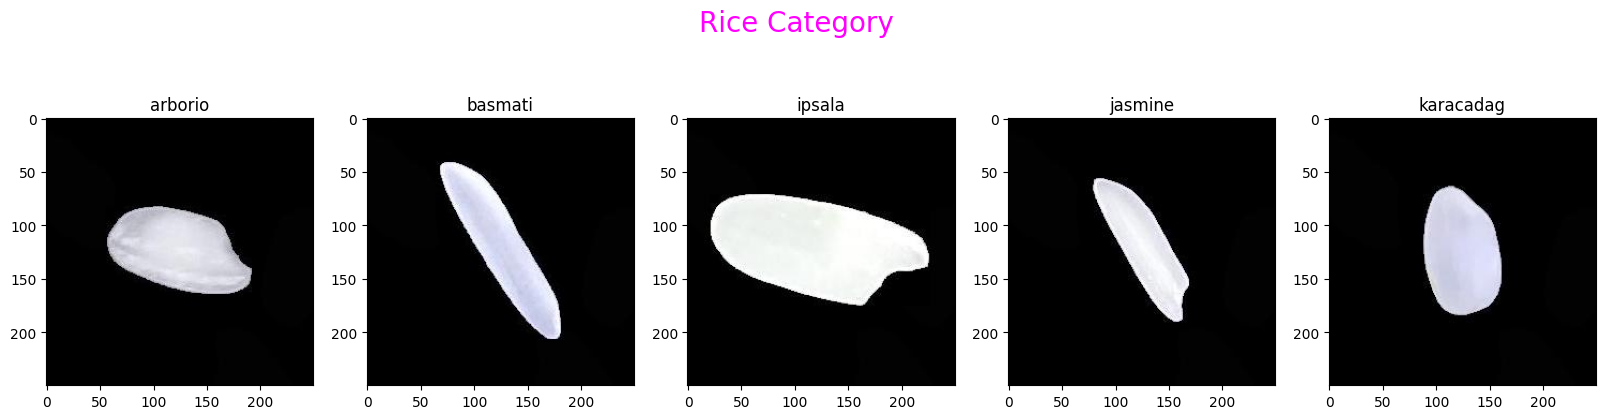

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category',color='magenta',fontsize=20)
arborio_img = img.imread(arborio[0])
basmati_img = img.imread(basmati[0])
ipsala_img = img.imread(ipsala[0])
jasmine_img = img.imread(jasmine[0])
karacadag_img = img.imread(karacadag[0])

for index,name in enumerate(list(data.keys())):
   ax[index].set_title(name)

ax[0].imshow(arborio_img)
ax[1].imshow(basmati_img)
ax[2].imshow(ipsala_img)
ax[3].imshow(jasmine_img)
ax[4].imshow(karacadag_img)

In [ ]:
# Function to preprocess images: batch processing for speed
def preprocess_images(image_paths, label):
    images = [
        cv2.resize(cv2.imread(str(img_path)), (224, 224))
        for img_path in image_paths
    ]
    labels = [label] * len(image_paths)
    return images, labels

# Prepare datasets from provided data
images, labels = [], []
for label, (rice_type, image_paths) in enumerate(data.items()):
    rice_images, rice_labels = preprocess_images(image_paths, label)
    images.extend(rice_images)
    labels.extend(rice_labels)

# Convert lists to numpy arrays and normalize images
images = np.array(images, dtype=np.float32) / 255.0
# Convert to float32 for better computation
labels = np.array(labels, dtype=np.int32)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [ ]:
# Converting image paths to numpy arrays
def preprocess_images(image_paths, label):
    images = []
    labels = []
    for img_path in image_paths:
        img = cv2.imread(str(img_path))
        img = cv2.resize(img, (224, 224))
        # Resize to a consistent shape
        images.append(img)
        labels.append(label)
    return images, labels

# Prepare datasets
images = []
labels = []

for label, (rice_type, image_paths) in enumerate(data.items()):
    rice_images, rice_labels = preprocess_images(image_paths, label)
    images.extend(rice_images)
    labels.extend(rice_labels)

# Convert to numpy arrays and normalize
images = np.array(images) / 255.0
# Normalize pixel values to [0, 1]
labels = np.array(labels)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [ ]:
# Building the model
model = keras.Sequential([
    # Convolutional layers
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    # Flatten the layers
    keras.layers.Flatten(),

    # Fully connected layers
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5, activation='softmax')  # 5 classes for rice types
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # 20% of training data for validation
    epochs=20,
    batch_size=32,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
    ]
)


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.7524 - loss: 0.6206 - val_accuracy: 0.9725 - val_loss: 0.0628
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.9600 - loss: 0.1070 - val_accuracy: 0.9800 - val_loss: 0.0583
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.9682 - loss: 0.0853 - val_accuracy: 0.9800 - val_loss: 0.0710
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.9761 - loss: 0.0748 - val_accuracy: 0.9787 - val_loss: 0.0739
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.9793 - loss: 0.0603 - val_accuracy: 0.9762 - val_loss: 0.0622


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9734 - loss: 0.0790
Test Accuracy: 0.98


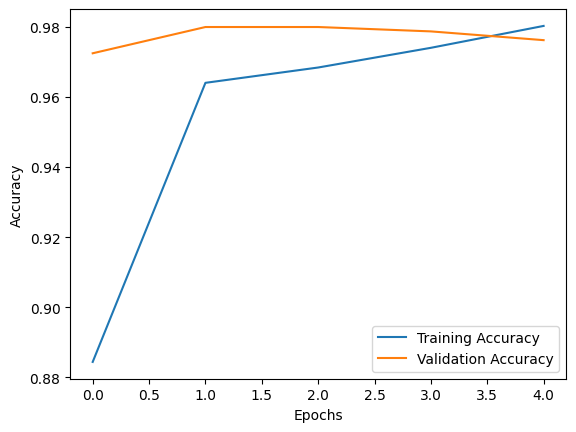

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Visualize training results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


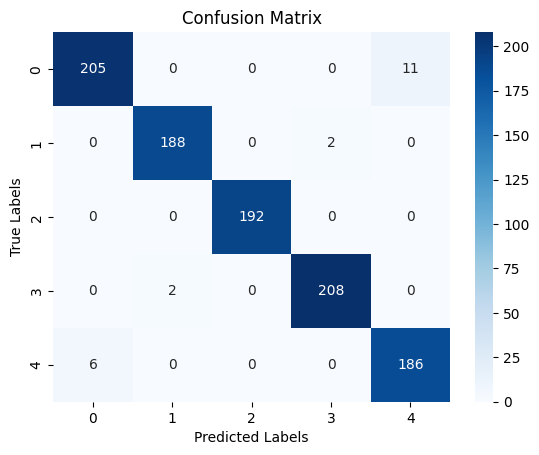

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       216
           1       0.99      0.99      0.99       190
           2       1.00      1.00      1.00       192
           3       0.99      0.99      0.99       210
           4       0.94      0.97      0.96       192

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred_classes))


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Compute metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Display the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


In [ ]:
model.save('/content/drive/MyDrive/rice_type_prediction_model.h5')


In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/rice_type_prediction_model.h5')

# Predict function
def predict_rice_type(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))  # Resize image
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)  # Get class with highest probability
    return predicted_class
rice_name = {
    0: "Arborio Rice",
    1: "Basmati Rice",
    2: "Ipsala Rice",
    3: "Jasmine Rice",
    4: "Karacadag Rice"
}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Class: 1 => [Basmati Rice]


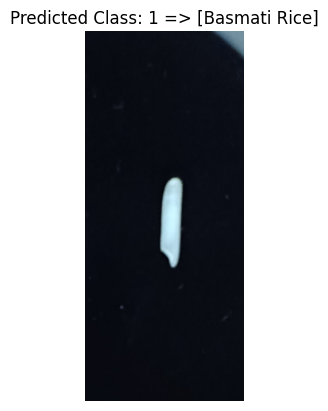

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = "/content/WhatsApp Image 2025-01-18 at 00.25.38_ca81b2e4.jpg"
predicted_class = predict_rice_type(image_path)
print(f"Predicted Class: {predicted_class} => [{rice_name[predicted_class]}]")
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.title(f"Predicted Class: {predicted_class} => [{rice_name[predicted_class]}]")
plt.show()
